## **Waste Classification using CNN Model**

In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow

**Uploading compressed dataset**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving DATASET.zip to DATASET.zip


In [15]:
import zipfile
import os

zip_path='DATASET.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall('/content/DATASET')

In [8]:
extrated_files=os.listdir('/content/DATASET')
print(extrated_files)

['DATASET']


In [10]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [11]:
train_path = "/content/DATASET/DATASET/TRAIN"
test_path = "/content/DATASET/DATASET/TEST"

In [12]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [13]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
  for file in tqdm(glob(category+'/*')):
    img_array = cv2.imread(file)
    img_array = cvtColor(img_array, cv2.COLOR_BGR2RGB)
    x_data.append(img_array)
    y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:10<00:00, 1237.51it/s]


([<matplotlib.patches.Wedge at 0x796aece72150>,
 [Text(-0.19545245391830102, 1.0824963456092194, 'Organic'),
  Text(0.1954525552689221, -1.0824963273096353, 'Recyclable')],
 [Text(-0.10661042940998237, 0.5904525521504832, '55.69%'),
  Text(0.10661048469213932, -0.590452542168892, '44.31%')])

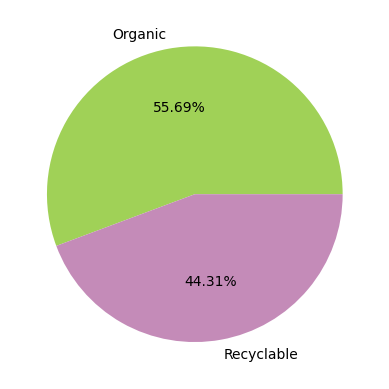

In [14]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors)

([<matplotlib.patches.Wedge at 0x796b7c339110>,
 [Text(-1.131700724955093, -0.20433665636913256, 'Organic'),
  Text(1.1317007058237096, 0.20433676232660034, 'Recyclable')],
 [Text(-0.6396569314963568, -0.11549463186081406, '55.69%'),
  Text(0.6396569206829663, 0.11549469174981755, '44.31%')])

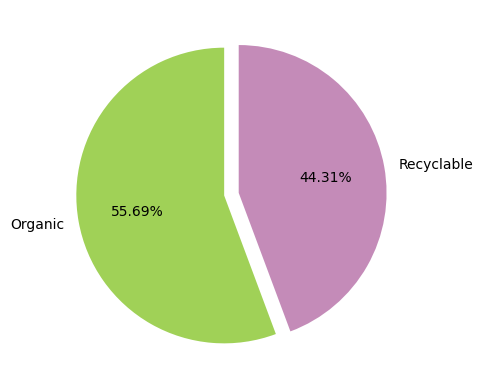

In [19]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=(0.05, 0.05))